In [77]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
df = pd.read_csv('ml.csv', sep=';')

# Define columns to be log-transformed
columns_to_log_transform = ['price']

# Apply log transformation to selected columns
df[columns_to_log_transform] = np.log(df[columns_to_log_transform])

y = df['price']
X = df.drop(columns=['price','Unnamed: 0','ejerudg','days_active','residents','grundskyldspromille'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.columns)

Index(['area', 'land_area', 'rooms', 'distance_to_city', 'municipal_tax_rate',
       'age', 'type_Villa', 'energy_B', 'energy_C', 'energy_D', 'energy_E',
       'energy_F', 'energy_G', 'close_Aarhus', 'close_Copenhagen',
       'close_Odense'],
      dtype='object')


# Lasso 1. Degree

In [78]:
results_lasso = []
degree=1
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 20)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=5000, cv=20)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha

In [79]:
d = {'test 1':y_test, 'prediction 1':y_pred}
df = pd.DataFrame(d)
df

,test 1,prediction 1
1448,15.318476,14.839984
11832,15.463207,15.592615
10949,14.912455,14.635056
15609,15.623799,14.768209
15723,15.295978,15.508858
...,...,...
4634,16.906553,15.166606
7782,15.122491,14.653756
4475,14.148405,14.353674
24437,16.001000,15.372224


Text(33.37500000000001, 0.5, 'Predicted Values')

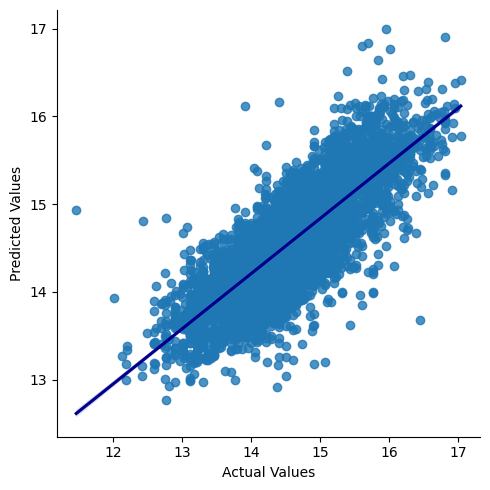

In [80]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 1', y='prediction 1',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree      MSE      RMSE       MAE        R2     Alpha
0                  1  0.22182  0.470978  0.366826  0.643962  0.000003


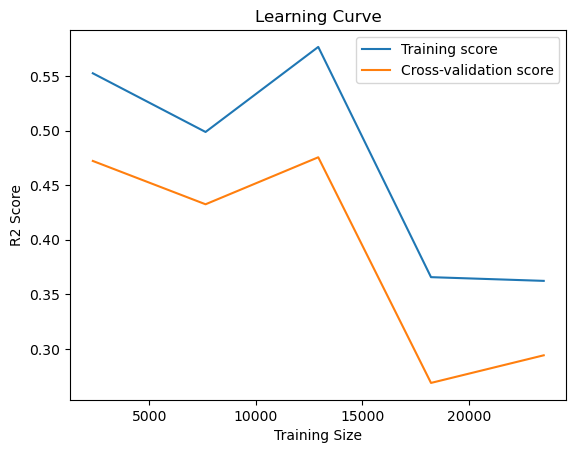

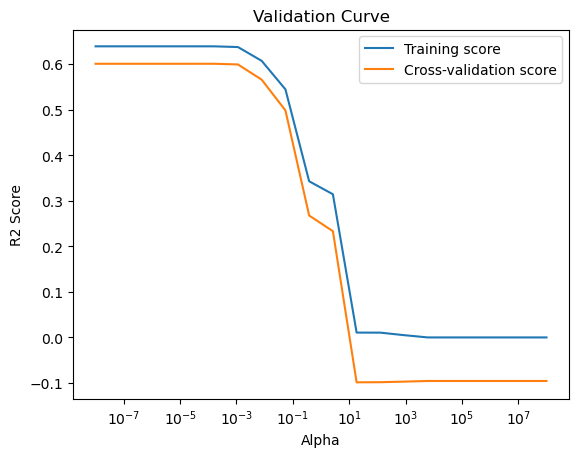

In [60]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-8, 8, 20)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



# Lasso 2. Degree

In [61]:
results_lasso = []
degree=2
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 20)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=10)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



c:\Users\Marti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.09582703254091, tolerance: 1.1000997384230486
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Marti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 802.6038802617281, tolerance: 1.1000997384230486
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Marti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269.4355063308217, tolerance: 1.1000997384230486
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Marti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617:

In [62]:
e = {'test 2':y_test, 'prediction 2':y_pred}
df = df.assign(**e)
df

,test 1,prediction 1,test 2,prediction 2
1448,15.318476,14.839984,15.318476,14.719892
11832,15.463207,15.592615,15.463207,15.701035
10949,14.912455,14.635056,14.912455,14.741569
15609,15.623799,14.768209,15.623799,14.743017
15723,15.295978,15.508858,15.295978,15.382915
...,...,...,...,...
4634,16.906553,15.166606,16.906553,15.455285
7782,15.122491,14.653756,15.122491,14.744072
4475,14.148405,14.353674,14.148405,14.474759
24437,16.001000,15.372224,16.001000,15.713347


Text(33.37500000000001, 0.5, 'Predicted Values')

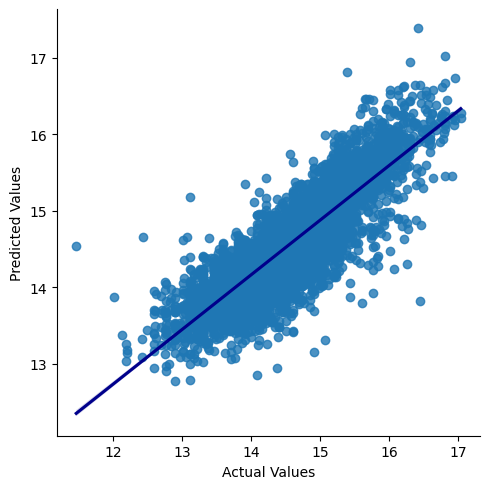

In [63]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 2', y='prediction 2',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree       MSE      RMSE      MAE        R2         Alpha
0                  2  0.170617  0.413058  0.31459  0.726147  1.000000e-08


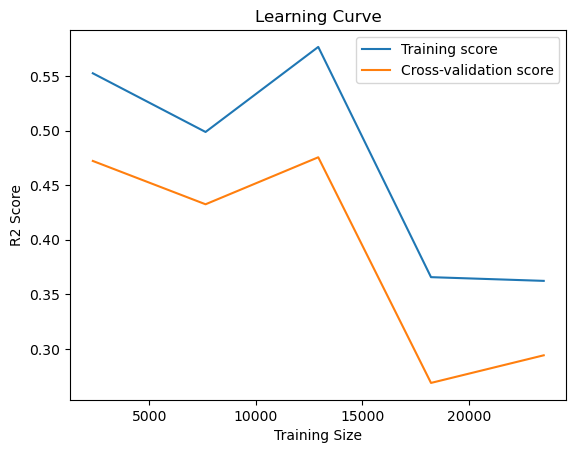

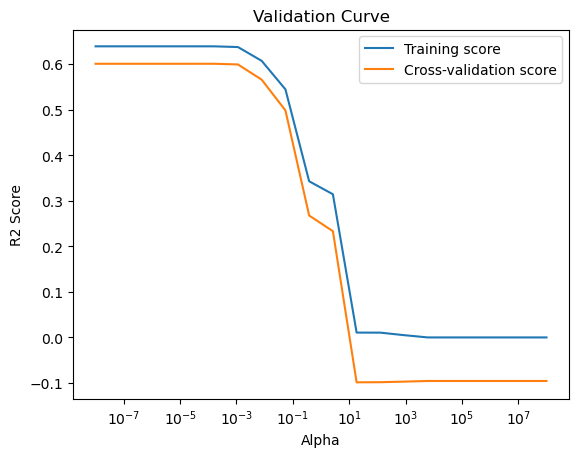

In [64]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-8, 8, 20)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



# Lasso 3. Degree

In [65]:
results_lasso = []
degree=3
# Creating polynomial features
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=5)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



c:\Users\Marti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+00, tolerance: 1.232e+00
  model = cd_fast.enet_coordinate_descent(


In [66]:
f = {'test 3':y_test, 'prediction 3':y_pred}
df = df.assign(**f)
df

,test 1,prediction 1,test 2,prediction 2,test 3,prediction 3
1448,15.318476,14.839984,15.318476,14.719892,15.318476,14.804990
11832,15.463207,15.592615,15.463207,15.701035,15.463207,15.764507
10949,14.912455,14.635056,14.912455,14.741569,14.912455,14.685396
15609,15.623799,14.768209,15.623799,14.743017,15.623799,14.855367
15723,15.295978,15.508858,15.295978,15.382915,15.295978,15.392399
...,...,...,...,...,...,...
4634,16.906553,15.166606,16.906553,15.455285,16.906553,15.557078
7782,15.122491,14.653756,15.122491,14.744072,15.122491,14.824494
4475,14.148405,14.353674,14.148405,14.474759,14.148405,14.534299
24437,16.001000,15.372224,16.001000,15.713347,16.001000,15.677090


Text(33.37500000000001, 0.5, 'Predicted Values')

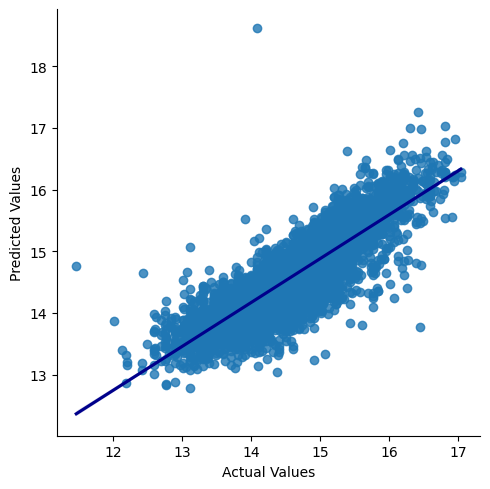

In [67]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 3', y='prediction 3',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree       MSE      RMSE       MAE        R2  Alpha
0                  3  0.169445  0.411637  0.308516  0.728028  0.001


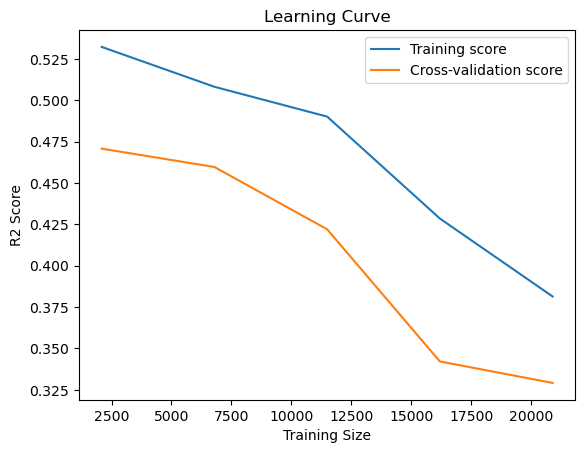

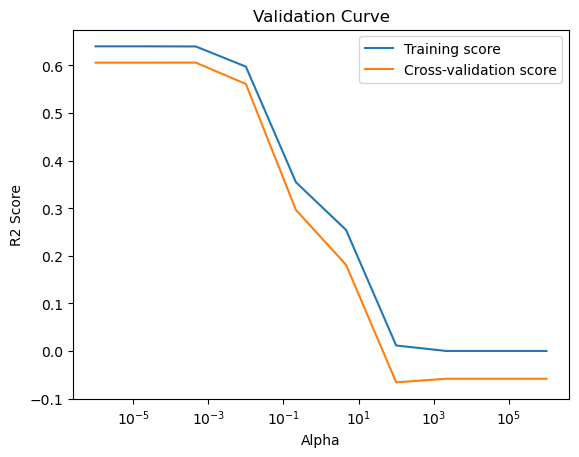

In [68]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-6, 6, 10)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



### Plots

# Ridge

In [84]:
results_ridge = []
degree=2
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 20)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = RidgeCV(alphas=alphas_to_test, cv=10)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_ridge.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha





In [85]:
e = {'test 2':y_test, 'prediction 2':y_pred}
df = df.assign(**e)
df


,test 1,prediction 1,test 2,prediction 2
1448,15.318476,14.839984,15.318476,14.687650
11832,15.463207,15.592615,15.463207,15.712279
10949,14.912455,14.635056,14.912455,14.747593
15609,15.623799,14.768209,15.623799,14.727917
15723,15.295978,15.508858,15.295978,15.362656
...,...,...,...,...
4634,16.906553,15.166606,16.906553,15.475382
7782,15.122491,14.653756,15.122491,14.769958
4475,14.148405,14.353674,14.148405,14.489696
24437,16.001000,15.372224,16.001000,15.728023


### Plots

Text(33.37500000000001, 0.5, 'Predicted Values')

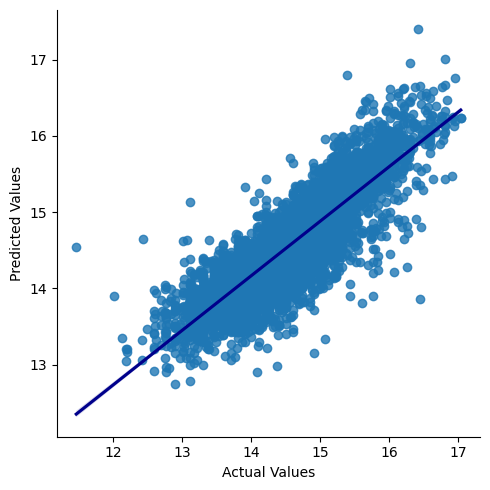

In [86]:
sns.lmplot(data=df,x='test 2', y='prediction 2',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree       MSE     RMSE       MAE        R2     Alpha
0                  2  0.170115  0.41245  0.314187  0.726953  0.007848


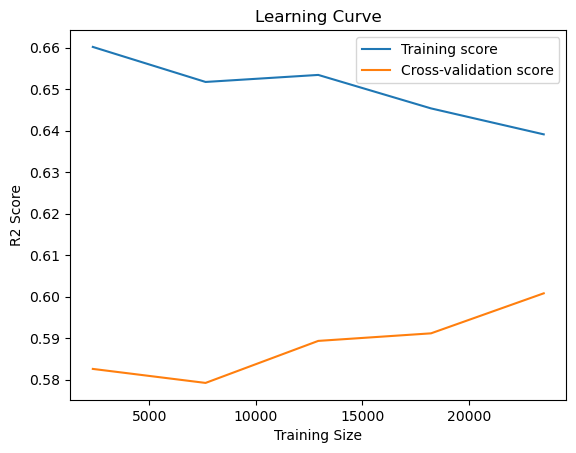

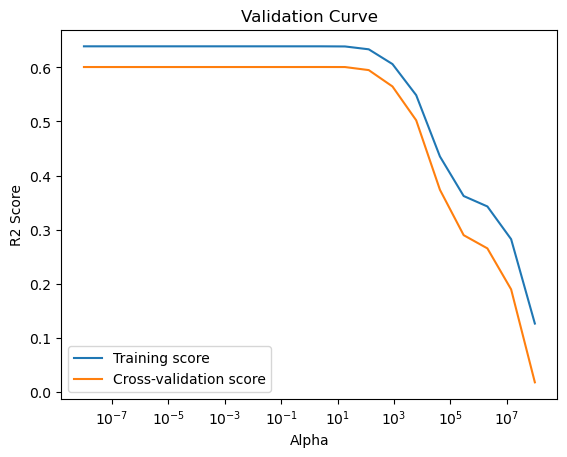

In [88]:
# Tabulate results
results_df = pd.DataFrame(results_ridge, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(RidgeCV(), X, y, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-8, 8, 20)
train_scores, test_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()


# Elastic Net


### Plots